In [1]:
import numpy as np
import pandas as pd
data = pd.read_excel('3span-beams-SK.xlsx')
print(data.shape)
data=data.dropna()
print(data.shape)

(68443, 98)
(68443, 98)


In [2]:
L=[0.0,1.35000002,2.70000005,2.70000005,4.05000019,5.4000001,5.4000001,6.75,8.10000038,8.10000038,9.45000076,10.8000002,
    10.8000002,12.1499996,13.5,13.5,14.8500004,16.2000008,16.2000008,17.5499992,
    18.8999996,18.8999996,20.25,21.6000004,21.6000004,22.9500008,24.2999992,24.2999992,
    25.6499996,27.0,27.0,28.25,29.5,29.5,30.75,32.0,32.0,33.25,34.5,34.5,35.75,37.0,37.0,
    38.25,39.5,39.5,40.75,42.0,42.0,43.25,44.5,44.5,45.75,47.0,47.0,48.25,49.5,49.5,50.75,
    52.0,52.0,53.2000008,54.4000015,54.4000015,55.5999985,56.7999992,56.7999992,58.0,59.2000008,
    59.2000008,60.4000015,61.5999985,61.5999985,62.7999992,64.0,64.0,65.1999969,66.4000015,
    66.4000015,67.6000061,68.8000031,68.8000031,70.0,71.1999969,71.1999969,72.3999939,73.5999985,
    73.5999985,74.8000031,76.0]

10,11
13,14
16,17
19,20
22,23
25,26



len(L)

90

In [3]:
shape=data.shape
N=shape[0]

inp=np.zeros((N,7,1))
LPF = np.zeros((N,1))
Y = np.zeros((N,31))


for ii in range(0,N):
    
    P1= int(data.iloc[ii,0])
    P2= int(data.iloc[ii,1])
    P3= int(data.iloc[ii,2])
    
    L1= int(data.iloc[ii,4])
    L2= int(data.iloc[ii,5])
    L3= int(data.iloc[ii,6])
    
    inp[ii,0,0] = P1*0.01
    inp[ii,1,0] = P2*0.01
    inp[ii,2,0] = P3*0.01
    
    inp[ii,3,0] = L1
    inp[ii,4,0] = L2
    inp[ii,5,0] = L3
    
    LPF[ii,0]= data.iloc[ii][3]
    
    pos = data.iloc[ii,7]
    if pos=="meio":
        inp[ii,6,0] = 0
    elif pos=="ponta":
        inp[ii,6,0] = 1

    
    
    Y[ii,:] = data.iloc[ii][[8,10,13,16,19,22,25,28,31,34,37,40,43,46,49,52,55,58,61,64,67,70,73,76,79,82,85,88,91,94,97]]


    




In [4]:
for i in range(10):
    print(inp[i,:,0])

[ 3.32  6.64  1.66  6.    8.   10.    1.  ]
[1.73 0.86 3.46 8.   1.   7.   1.  ]
[0.42 0.42 0.21 4.   6.   1.   1.  ]
[3.58 1.79 7.16 5.   5.   8.   1.  ]
[ 2.08  2.08  1.04 10.    5.   10.    1.  ]
[ 3.85  7.7   3.85  1.   10.    8.    1.  ]
[3.03 6.06 6.06 5.   1.   6.   1.  ]
[3.56 7.12 1.78 1.   4.   5.   1.  ]
[ 0.96  1.92  1.92  9.   10.    5.    0.  ]
[1.97 0.98 0.98 4.   9.   4.   1.  ]


In [5]:
import keras as krs
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
import matplotlib.pyplot as plt
from keras.utils import plot_model

inputA = krs.Input(shape=(7,))

z = Dense(512, activation="relu")(inputA)
z = Dense(256, activation="relu")(z)
z = Dense(128, activation="relu")(z)
z = Dense(64, activation="relu")(z)
z = Dense(32, activation="relu")(z)
z = Dense(31, activation="linear")(z)

# our model will accept the inputs of the two branches and
# then output a single value
NN_SK_model = krs.Model(inputs=inputA, outputs=z)
NN_SK_model.compile(loss='mean_squared_error', optimizer=krs.optimizers.adam(clipnorm=1)) 


NN_SK_history = NN_SK_model.fit( inp[:,:,0], Y, validation_data=(inp[:,:,0], Y),
                        epochs=100, batch_size=32, verbose=1)  
    
    
plt.figure()
# Plot training & validation loss values
plt.plot(NN_SK_history.history['loss'],label = 'SK')

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


Using TensorFlow backend.
c:\users\nuno\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\nuno\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\nuno\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1







Train on 68443 samples, validate on 68443 samples
Epoch 1/100
68443/68443 [==============================] - 9s 134us/step - loss: 0.0077 - val_loss: 0.0068
Epoch 2/100
68443/68443 [==============================] - 9s 125us/step - loss: 0.0051 - val_loss: 0.0049
Epoch 3/100
68443/68443 [==============================] - 8s 122us/step - loss: 0.0048 - val_loss: 0.0041
Epoch 4/100
68443/68443 [==============================] - 8s 122us/step - loss: 0.0045 - val_loss: 0.0045
Epoch 5/100
68443/68443 [==============================] - 8s 120us/step - loss: 0.0044 - val_loss: 0.0038
Epoch 6/100
68443/68443 [==============================] - 8s 123us/step - loss: 0.0043 - val_loss: 0.0043
Epoch 7/100
68443/68443 [==============================] - 8s 121us/step - loss: 0.0042 - val_loss: 0.0043
Epoch 8/100
68443/68443 [==============================] - 8s 119us/step - loss: 0.0042 - val_loss: 0.0040
Epoch 9/100
68443/68443 [==============================] - 8s 120us/step - loss: 0.0041 

68443/68443 [==============================] - 9s 127us/step - loss: 0.0036 - val_loss: 0.0034
Epoch 65/100
68443/68443 [==============================] - 9s 126us/step - loss: 0.0036 - val_loss: 0.0039
Epoch 66/100
68443/68443 [==============================] - 9s 126us/step - loss: 0.0036 - val_loss: 0.0036
Epoch 67/100
68443/68443 [==============================] - 9s 125us/step - loss: 0.0037 - val_loss: 0.0035
Epoch 68/100
68443/68443 [==============================] - 9s 129us/step - loss: 0.0036 - val_loss: 0.0035
Epoch 69/100
68443/68443 [==============================] - 9s 124us/step - loss: 0.0036 - val_loss: 0.0036
Epoch 70/100
68443/68443 [==============================] - 8s 124us/step - loss: 0.0036 - val_loss: 0.0036
Epoch 71/100
68443/68443 [==============================] - 9s 125us/step - loss: 0.0036 - val_loss: 0.0034
Epoch 72/100
68443/68443 [==============================] - 9s 127us/step - loss: 0.0036 - val_loss: 0.0041
Epoch 73/100
68443/68443 [===============

<Figure size 640x480 with 1 Axes>

In [6]:
xticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]

In [7]:
  y_pred1 = NN_SK_model.predict([inp[:,:,0]])

7.0 6.0 3.0


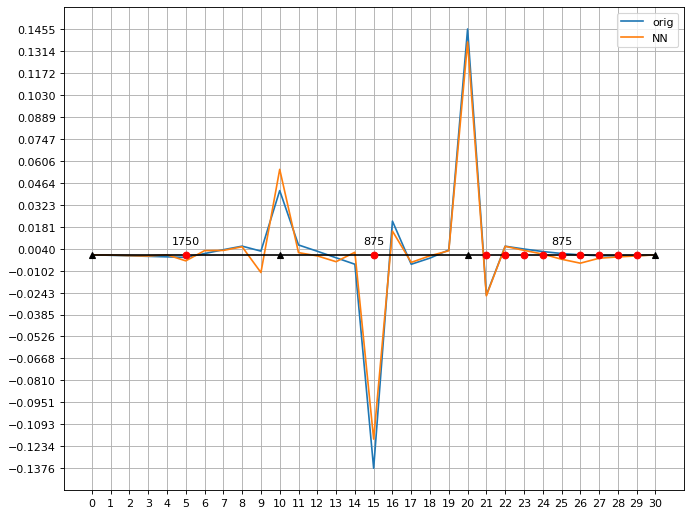

5.0 10.0 1.0


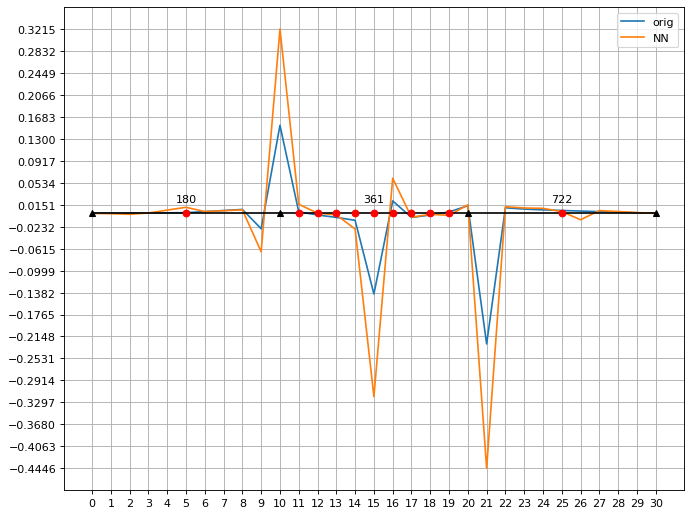

10.0 1.0 4.0


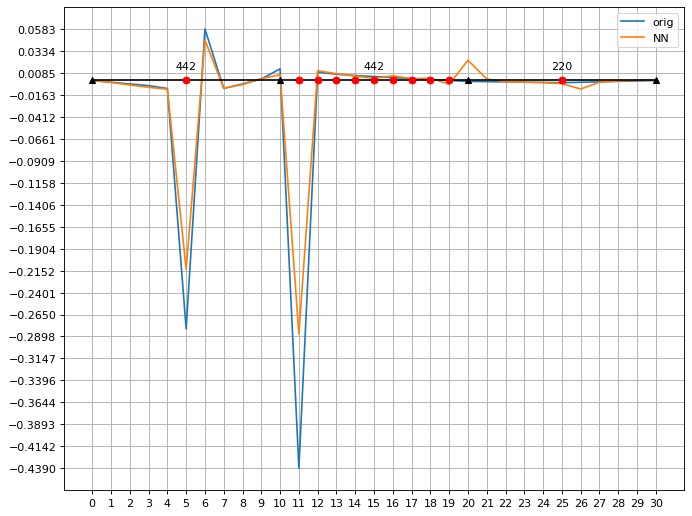

4.0 6.0 9.0


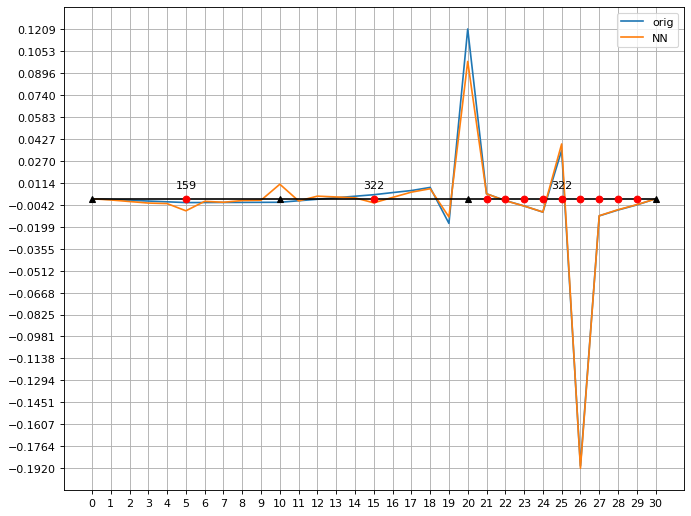

5.0 4.0 10.0


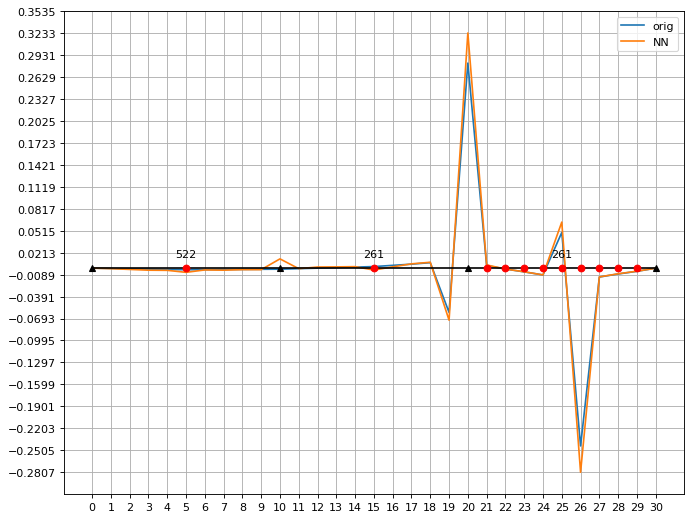

8.0 9.0 10.0


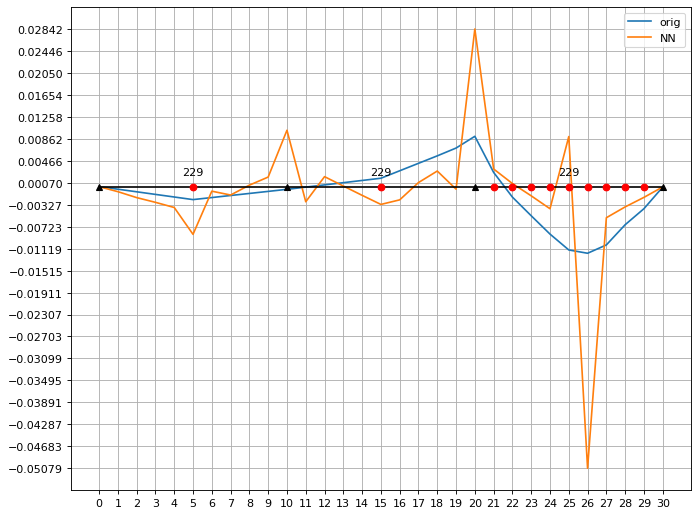

9.0 7.0 2.0


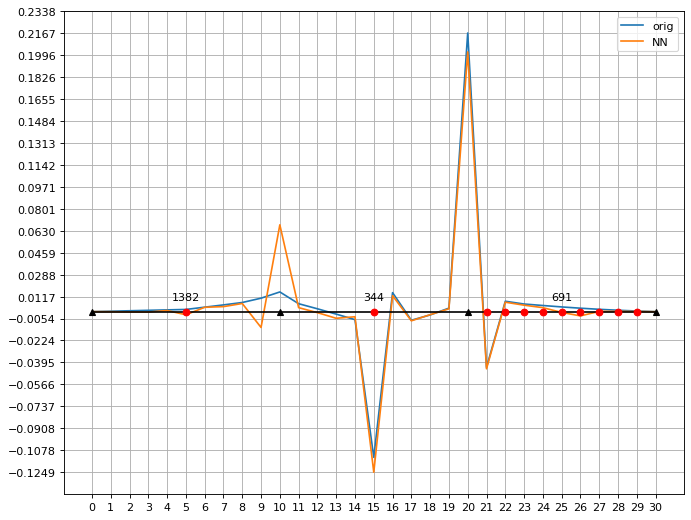

5.0 2.0 8.0


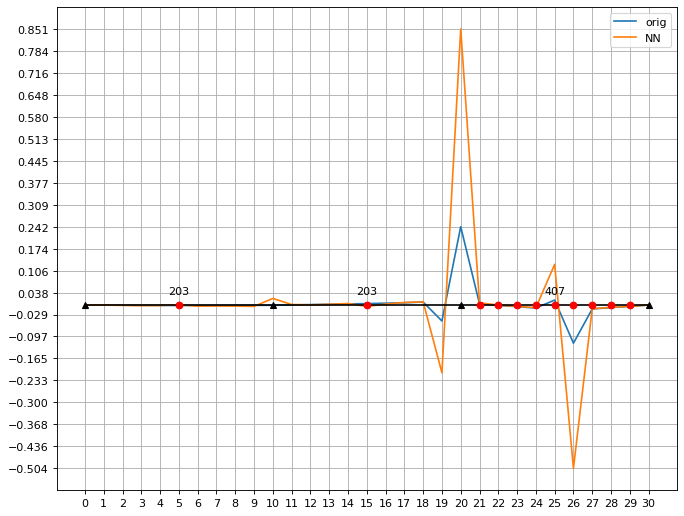

3.0 7.0 10.0


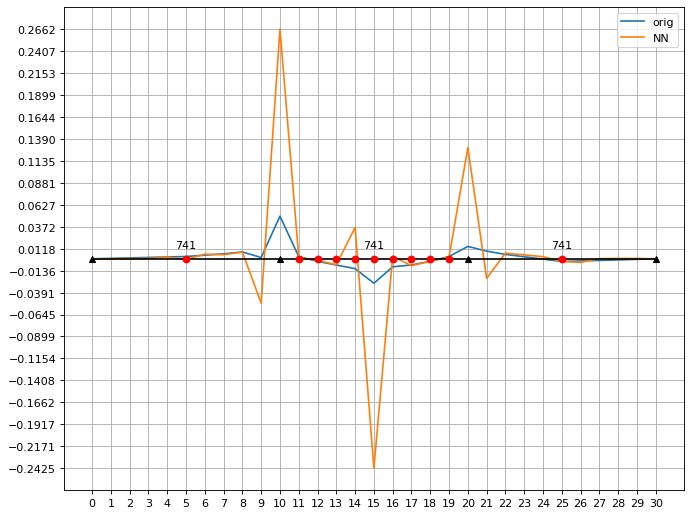

7.0 4.0 5.0


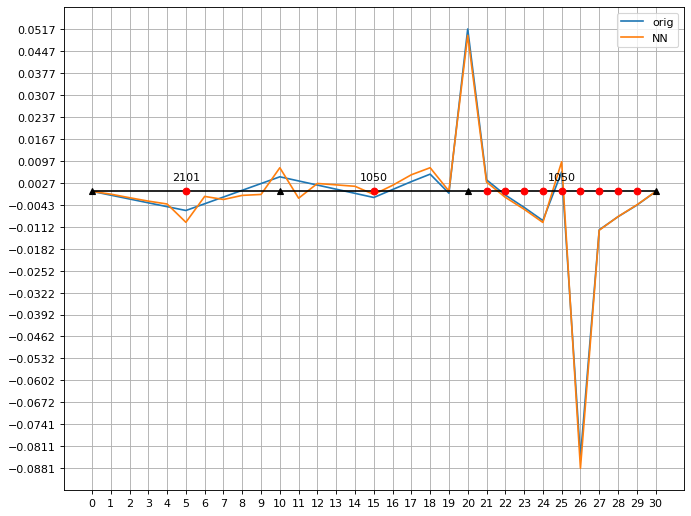

In [8]:
import time
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
for ii in [345,54354,54323,543,34534,765,7653,4326,1243,6433]:
    figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
    
  
    
    print(inp[ii,3,0],inp[ii,4,0],inp[ii,5,0])
    
    maximo = max([max(y_pred1[ii,:]),max(Y[ii,:])])
    minimo = min([min(y_pred1[ii,:]),min(Y[ii,:])])
        
    plt.plot(Y[ii,:],label='orig')
    plt.plot(y_pred1[ii,:],label='NN')
    #plt.plot(Y[ii,:]-y_pred1[ii,:],label='error')
    
    plt.plot([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],'k-')
    plt.plot([0,10,20,30],[0,0,0,0],'^k')
    if inp[ii,6,0]:
        loads=[5,15,21,22,23,24,25,26,27,28,29]
        dots=[25,5,15]
    else:
        loads=[5,11,12,13,14,15,16,17,18,19,25]
        dots=[15,5,25]
    plt.plot(loads,[0,0,0,0,0,0,0,0,0,0,0],'ro')
    
    for i in range(3):
        plt.annotate(int(inp[ii,i,0]*100*LPF[ii,0]), # this is the text
        (dots[i],0), # this is the point to label
        textcoords="offset points", # how to position the text
        xytext=(0,10), # distance from text to points (x,y)
        ha='center') # horizontal alignment can be left, right or center
    
        
    stepd=(maximo-minimo)/20.0
    plt.yticks(np.arange(minimo, maximo +stepd ,step=stepd))
    plt.xticks(xticks)
    plt.legend()
    plt.grid()
    plt.show()
    time.sleep(2) 
    plt.close()